In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install numpy

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0272EN-SkillsNetwork/labs/dataset/2016.csv"
df=pd.read_csv(URL)

In [7]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*60)
print("Dataset Information:")
print("="*60)
df.info()

Dataset Shape: (157, 13)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      155 non-null    object 
 6   Economy (GDP per Capita)       156 non-null    object 
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       155 non-null    object 
 9   Freedom                        157 non-null    object 
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dys

In [10]:
print("\n" + "="*60)
print("Data Types:")
print("="*60)
print(df.dtypes)



Data Types:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [11]:

print("\n" + "="*60)
print("Statistical Summary:")
print("="*60)
print(df.describe())



Statistical Summary:
       Happiness Rank  Happiness Score  Lower Confidence Interval      Family  \
count      157.000000       157.000000                 153.000000  157.000000   
mean        78.980892         5.382185                   5.268641    0.793621   
std         45.466030         1.141674                   1.151503    0.266706   
min          1.000000         2.905000                   2.732000    0.000000   
25%         40.000000         4.404000                   4.322000    0.641840   
50%         79.000000         5.314000                   5.226000    0.841420   
75%        118.000000         6.269000                   6.128000    1.021520   
max        157.000000         7.526000                   7.460000    1.183260   

       Trust (Government Corruption)  Generosity  Dystopia Residual  
count                     157.000000  157.000000         157.000000  
mean                        0.137624    0.242635           2.325807  
std                         0.111038  

In [12]:

print("\n" + "="*60)
print("Null Values Count:")
print("="*60)
print(df.isnull().sum())


Null Values Count:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        4
Upper Confidence Interval        2
Economy (GDP per Capita)         1
Family                           0
Health (Life Expectancy)         2
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [13]:
print("="*60)
print("BEFORE CLEANING")
print("="*60)
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Missing Values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()
print(f"\nColumns with missing values: {cols_with_missing}")

BEFORE CLEANING

Missing Values:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        4
Upper Confidence Interval        2
Economy (GDP per Capita)         1
Family                           0
Health (Life Expectancy)         2
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Total Missing Values: 9
Percentage of Missing Values: 0.44%

Columns with missing values: ['Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)']


In [15]:
# Handle missing values

# Numerical: mean imputation
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df.loc[:, col] = df[col].fillna(mean_value)
        print(f"\nFilled {col} with mean value: {mean_value:.4f}")

# Categorical: mode imputation
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df.loc[:, col] = df[col].fillna(mode_value)
        print(f"\nFilled {col} with mode value: {mode_value}")

print("\n" + "="*60)
print("AFTER CLEANING")
print("="*60)
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")



AFTER CLEANING

Missing Values:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Total Missing Values: 0


In [16]:
# Verify data types are still correct
print("\n" + "="*60)
print("Data Types After Cleaning:")
print("="*60)
print(df.dtypes)

# Save cleaned dataset
df.to_csv('world_happiness_report_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'world_happiness_report_cleaned.csv'")


Data Types After Cleaning:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Cleaned dataset saved as 'world_happiness_report_cleaned.csv'


In [17]:
import os
os.getcwd()


'C:\\Users\\Mohan'

In [18]:
import os
os.path.isfile('world_happiness_report_cleaned.csv')


True

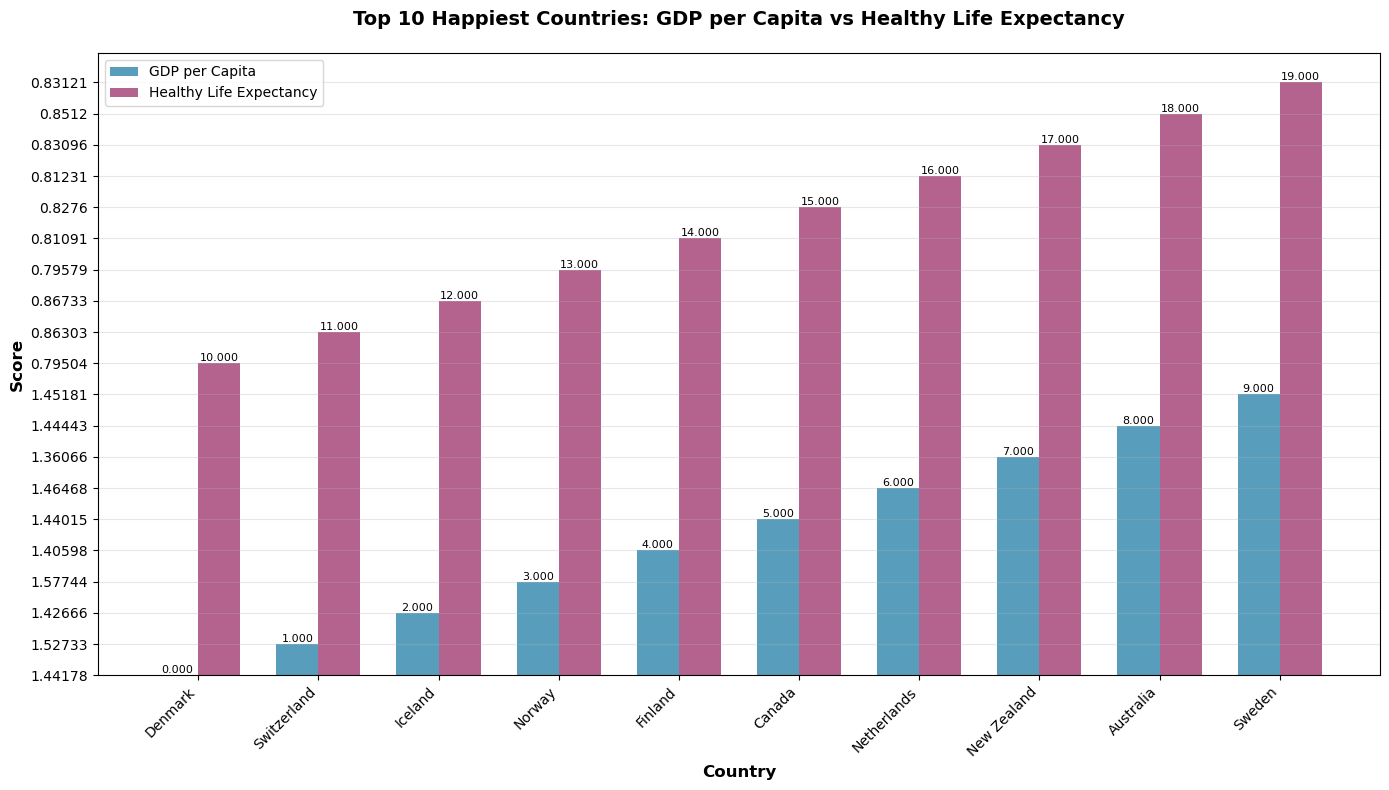

In [20]:
#Create Python code to identify the top 10 countries by Happiness Score and create a bar chart showing their GDP per capita and Healthy Life Expectancy side by side.

df = pd.read_csv('world_happiness_report_cleaned.csv')

# Identify top 10 countries by Happiness Score
# Adjust column names based on your dataset
# Common variations: 'Happiness Score', 'Happiness.Score', 'Score'
# Common variations: 'Economy (GDP per Capita)', 'GDP per capita', 'Economy..GDP.per.Capita.'
# Common variations: 'Health (Life Expectancy)', 'Healthy life expectancy', 'Health..Life.Expectancy.'

top_10 = df.nlargest(10, 'Happiness Score')

# Extract country names, GDP, and Life Expectancy
countries = top_10['Country'].values
gdp = top_10['Economy (GDP per Capita)'].values
life_exp = top_10['Health (Life Expectancy)'].values

# Set up bar chart
x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, gdp, width, label='GDP per Capita', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, life_exp, width, label='Healthy Life Expectancy', color='#A23B72', alpha=0.8)

# Customize chart
ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Happiest Countries: GDP per Capita vs Healthy Life Expectancy', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('top_10_countries_gdp_life_expectancy.png', dpi=300, bbox_inches='tight')
plt.show()



In [21]:
# Display the data table
print("Top 10 Happiest Countries:")
print("="*80)
print(top_10[['Country', 'Happiness Score', 'Economy (GDP per Capita)', 
              'Health (Life Expectancy)']].to_string(index=False))

Top 10 Happiest Countries:
    Country  Happiness Score Economy (GDP per Capita) Health (Life Expectancy)
    Denmark            7.526                  1.44178                  0.79504
Switzerland            7.509                  1.52733                  0.86303
    Iceland            7.501                  1.42666                  0.86733
     Norway            7.498                  1.57744                  0.79579
    Finland            7.413                  1.40598                  0.81091
     Canada            7.404                  1.44015                   0.8276
Netherlands            7.339                  1.46468                  0.81231
New Zealand            7.334                  1.36066                  0.83096
  Australia            7.313                  1.44443                   0.8512
     Sweden            7.291                  1.45181                  0.83121


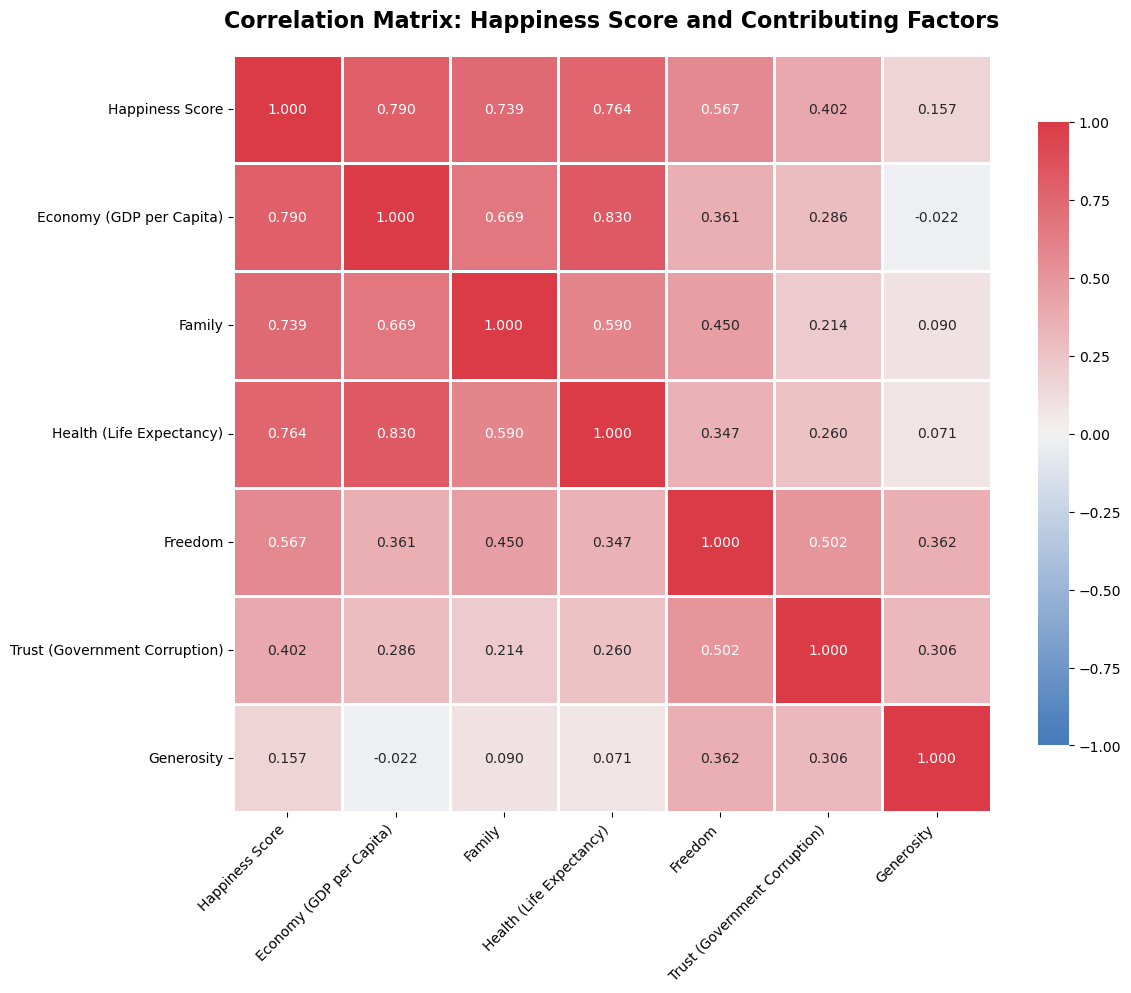

In [25]:
#Create Python code to calculate and visualize the correlation between Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Happiness Score using a heatmap.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

# Select relevant columns for correlation analysis
correlation_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

# ============================================
# FIX 1 — Convert problematic numeric columns to float
# ============================================

numeric_fix_cols = [
    'Economy (GDP per Capita)',
    'Health (Life Expectancy)',
    'Freedom'
]

for col in numeric_fix_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ============================================
# FIX 2 — Re-impute any new NaN values created above
# ============================================

df[correlation_columns] = df[correlation_columns].fillna(df[correlation_columns].mean())

# ============================================
# Create correlation matrix
# ============================================

correlation_data = df[correlation_columns]
correlation_matrix = correlation_data.corr()

# ============================================
# Create heatmap
# ============================================

fig, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',
    cmap=cmap,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
    ax=ax
)

ax.set_title(
    'Correlation Matrix: Happiness Score and Contributing Factors',
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# ============================================
# Display correlation with Happiness Score
# ============================================

print("="*80)
print("Correlation with Happiness Score (sorted by strength):")
print("="*80)

happiness_corr = (
    correlation_matrix['Happiness Score']
    .drop('Happiness Score')
    .sort_values(ascending=False)
)

for feature, corr_value in happiness_corr.items():
    print(f"{feature:40s}: {corr_value:+.4f}")

# ============================================
# Strongest correlations
# ============================================

print("\n" + "="*80)
print("Key Insights:")
print("="*80)
print(f"Strongest positive correlation: {happiness_corr.idxmax()} ({happiness_corr.max():+.4f})")
print(f"Weakest correlation: {happiness_corr.idxmin()} ({happiness_corr.min():+.4f})")


Correlation with Happiness Score (sorted by strength):
Economy (GDP per Capita)                : +0.7896
Health (Life Expectancy)                : +0.7635
Family                                  : +0.7393
Freedom                                 : +0.5668
Trust (Government Corruption)           : +0.4020
Generosity                              : +0.1568

Key Insights:
Strongest positive correlation: Economy (GDP per Capita) (+0.7896)
Weakest correlation: Generosity (+0.1568)


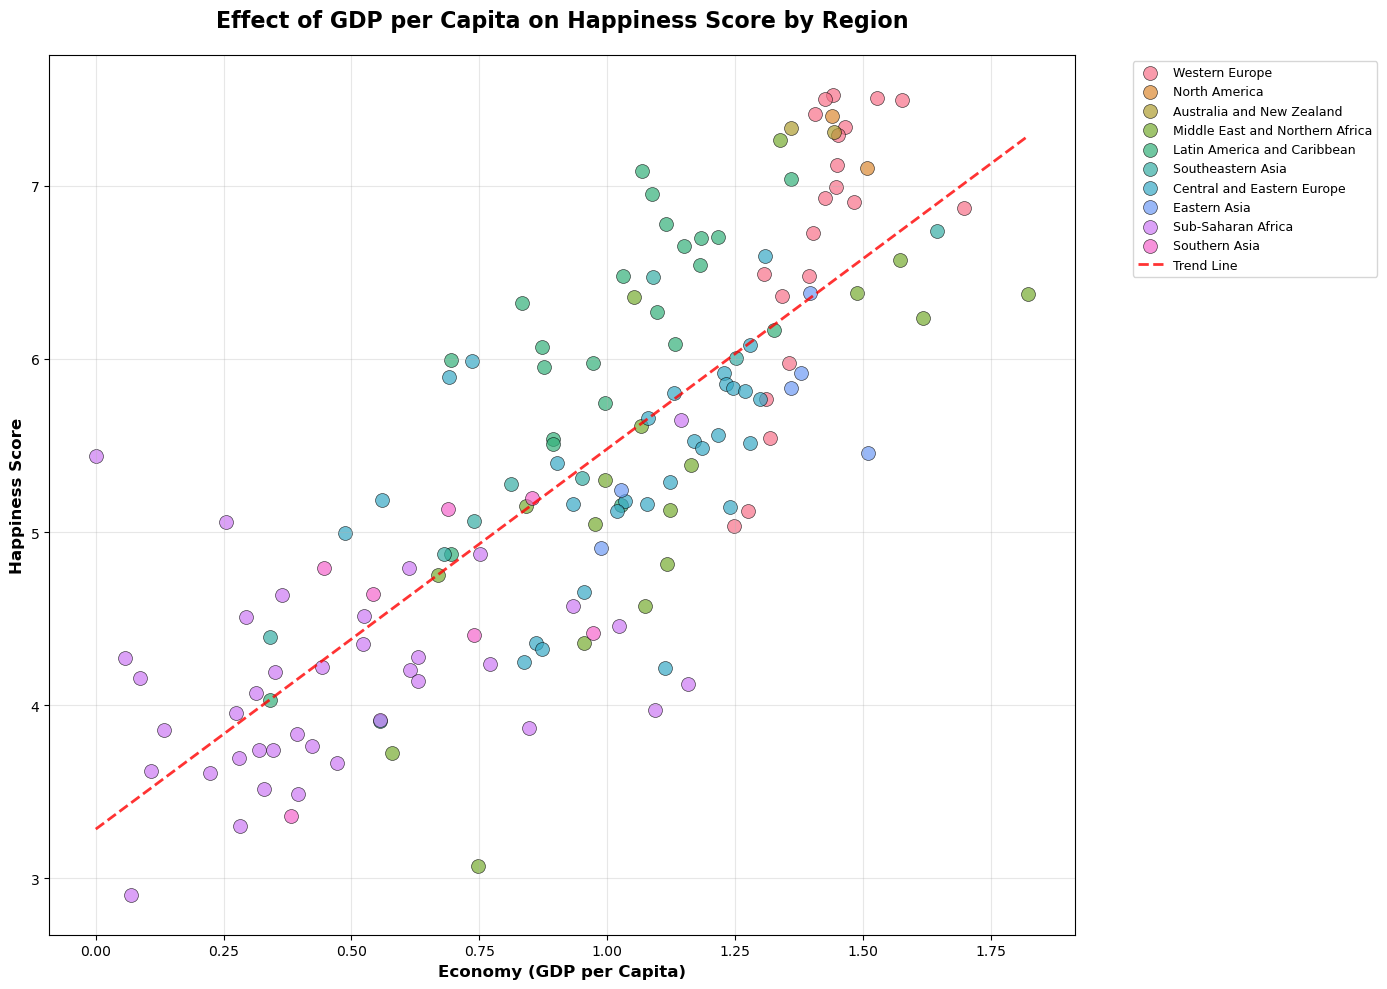

Overall Correlation between GDP per Capita and Happiness Score: 0.7914

Correlation by Region:
Australia and New Zealand               : -1.0000
Central and Eastern Europe              : +0.4268
Eastern Asia                            : +0.7075
Latin America and Caribbean             : +0.7787
Middle East and Northern Africa         : +0.7767
North America                           : -1.0000
Southeastern Asia                       : +0.9122
Southern Asia                           : +0.4443
Sub-Saharan Africa                      : +0.3178
Western Europe                          : +0.7198


In [33]:
#Create Python code to generate a scatter plot showing the relationship between GDP per Capita and Happiness Score, with different colors representing different regions.
# Load dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

# Ensure numeric columns are numbers (fixes your error)
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')

# Drop rows with missing numeric values needed for plotting
df = df.dropna(subset=['Economy (GDP per Capita)', 'Happiness Score', 'Region'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 10))

# Get unique regions and create color palette
regions = df['Region'].unique()
colors = sns.color_palette('husl', n_colors=len(regions))
color_map = dict(zip(regions, colors))

# Plot each region
for region in regions:
    region_data = df[df['Region'] == region]
    ax.scatter(
        region_data['Economy (GDP per Capita)'],
        region_data['Happiness Score'],
        label=region,
        alpha=0.7,
        s=100,
        color=color_map[region],
        edgecolors='black',
        linewidth=0.5
    )

# Add trend line
z = np.polyfit(df['Economy (GDP per Capita)'], df['Happiness Score'], 1)
p = np.poly1d(z)

x_trend = np.linspace(
    df['Economy (GDP per Capita)'].min(),
    df['Economy (GDP per Capita)'].max(),
    100
)

ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend Line')

# Customize plot
ax.set_xlabel('Economy (GDP per Capita)', fontsize=12, fontweight='bold')
ax.set_ylabel('Happiness Score', fontsize=12, fontweight='bold')
ax.set_title('Effect of GDP per Capita on Happiness Score by Region',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gdp_happiness_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlations
correlation = df['Economy (GDP per Capita)'].corr(df['Happiness Score'])
print("="*80)
print(f"Overall Correlation between GDP per Capita and Happiness Score: {correlation:.4f}")
print("="*80)

# Correlation by region
print("\nCorrelation by Region:")
print("="*80)
for region in sorted(regions):
    region_data = df[df['Region'] == region]
    if len(region_data) > 1:
        region_corr = region_data['Economy (GDP per Capita)'].corr(region_data['Happiness Score'])
        print(f"{region:40s}: {region_corr:+.4f}")
    else:
        print(f"{region:40s}: Insufficient data")

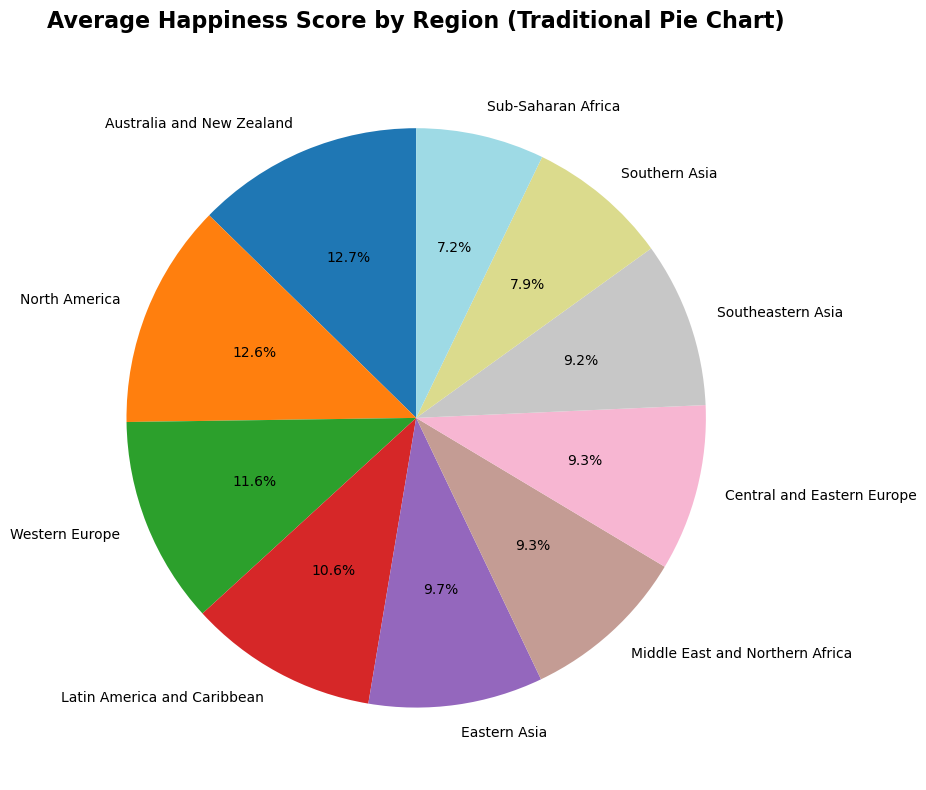

Average Happiness Score by Region:
Australia and New Zealand               : 7.3235 (2 countries)
North America                           : 7.2540 (2 countries)
Western Europe                          : 6.6857 (21 countries)
Latin America and Caribbean             : 6.1018 (24 countries)
Eastern Asia                            : 5.6242 (6 countries)
Middle East and Northern Africa         : 5.3861 (19 countries)
Central and Eastern Europe              : 5.3707 (29 countries)
Southeastern Asia                       : 5.3389 (9 countries)
Southern Asia                           : 4.5633 (7 countries)
Sub-Saharan Africa                      : 4.1364 (38 countries)

Happiest Region: Australia and New Zealand (7.3235)
Least Happy Region: Sub-Saharan Africa (4.1364)
Global Average: 5.3822


In [35]:
#Create Python code to generate a pie chart showing the average Happiness Score by region with percentages and labels.

# Load cleaned dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

# Calculate average happiness score by region
happiness_by_region = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Create a traditional pie chart
fig, ax = plt.subplots(figsize=(12, 8))

# Standard color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(happiness_by_region)))

# Traditional pie chart (no donut, no explode)
ax.pie(
    happiness_by_region.values,
    labels=happiness_by_region.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)

# Title
ax.set_title(
    'Average Happiness Score by Region (Traditional Pie Chart)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.savefig('happiness_by_region_traditional_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# Display data table
print("="*80)
print("Average Happiness Score by Region:")
print("="*80)
for region, score in happiness_by_region.items():
    country_count = len(df[df['Region'] == region])
    print(f"{region:40s}: {score:.4f} ({country_count} countries)")

print("\n" + "="*80)
print(f"Happiest Region: {happiness_by_region.idxmax()} ({happiness_by_region.max():.4f})")
print(f"Least Happy Region: {happiness_by_region.idxmin()} ({happiness_by_region.min():.4f})")
print(f"Global Average: {df['Happiness Score'].mean():.4f}")
print("="*80)

In [37]:
!pip install jupyter-dash

Interactive map saved as 'world_gdp_map.html'


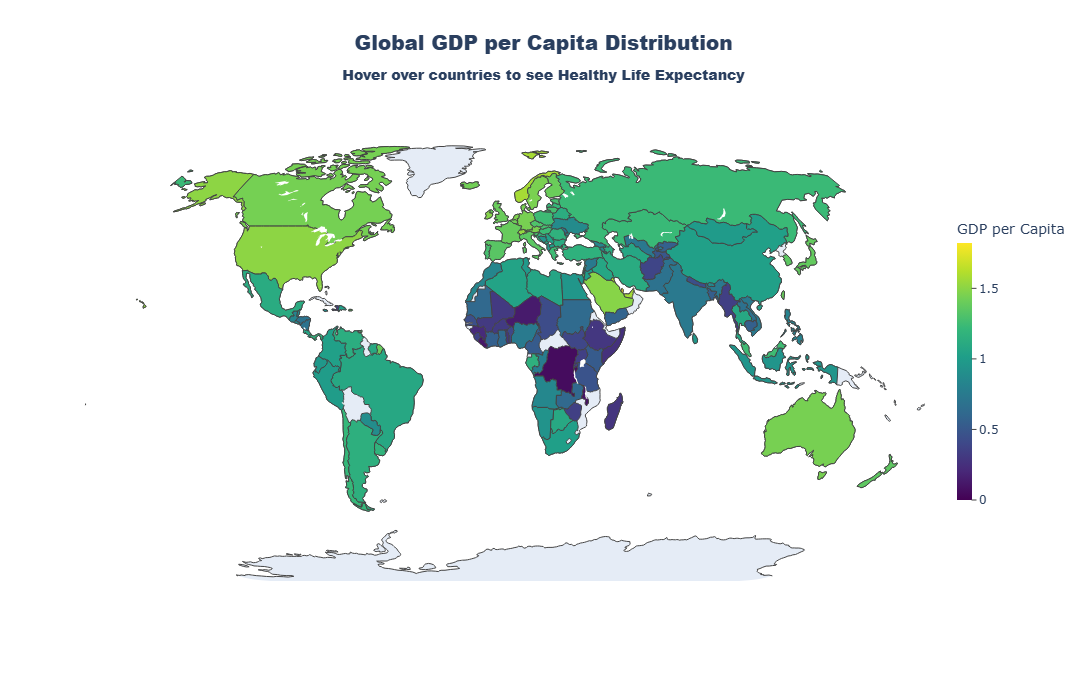


GDP per Capita Statistics:
Highest GDP per Capita: Qatar
Value: 1.8243

Lowest GDP per Capita: Somalia
Value: 0.0000

Global Average GDP per Capita: 0.9518
Global Average Life Expectancy Score: 0.5543


In [48]:
#Create Python code to generate an interactive choropleth map showing GDP per capita by country with Healthy Life Expectancy displayed as a tooltip using plotly.

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load cleaned dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

# Convert numeric columns to proper numeric types
numeric_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                   'Social support', 'Freedom to make life choices', 'Generosity', 
                   'Perceptions of corruption']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create custom hover text
df['hover_text'] = (
    '<b>' + df['Country'] + '</b><br>' +
    'Happiness Score: ' + df['Happiness Score'].round(3).astype(str) + '<br>' +
    'GDP per Capita: ' + df['Economy (GDP per Capita)'].round(3).astype(str) + '<br>' +
    'Healthy Life Expectancy: ' + df['Health (Life Expectancy)'].round(3).astype(str) + '<br>' +
    'Region: ' + df['Region']
)

# Create choropleth map
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Economy (GDP per Capita)',
                    hover_name='Country',
                    hover_data={
                        'Country': False,
                        'Economy (GDP per Capita)': ':.3f',
                        'Health (Life Expectancy)': ':.3f',
                        'Happiness Score': ':.3f',
                        'Region': True
                    },
                    color_continuous_scale='Viridis',
                    title='Global GDP per Capita with Healthy Life Expectancy',
                    labels={'Economy (GDP per Capita)': 'GDP per Capita'})

# Update layout
fig.update_layout(
    title={
        'text': 'Global GDP per Capita Distribution<br><sub>Hover over countries to see Healthy Life Expectancy</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    width=1400,
    height=700,
    coloraxis_colorbar=dict(
        title="GDP per Capita",
        thicknessmode="pixels",
        thickness=15,
        lenmode="pixels",
        len=300,
        yanchor="middle",
        y=0.5,
        ticks="outside"
    )
)

# Save as HTML
fig.write_html('world_gdp_map.html')
print("Interactive map saved as 'world_gdp_map.html'")

# Show the figure
fig.show()

# Display statistics
print("\n" + "="*80)
print("GDP per Capita Statistics:")
print("="*80)
print(f"Highest GDP per Capita: {df.loc[df['Economy (GDP per Capita)'].idxmax(), 'Country']}")
print(f"Value: {df['Economy (GDP per Capita)'].max():.4f}")
print(f"\nLowest GDP per Capita: {df.loc[df['Economy (GDP per Capita)'].idxmin(), 'Country']}")
print(f"Value: {df['Economy (GDP per Capita)'].min():.4f}")
print(f"\nGlobal Average GDP per Capita: {df['Economy (GDP per Capita)'].mean():.4f}")
print(f"Global Average Life Expectancy Score: {df['Health (Life Expectancy)'].mean():.4f}")
print("="*80)

Dataset loaded with 153 valid records
Data types:
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

Dashboard saved as 'world_happiness_dashboard.html'


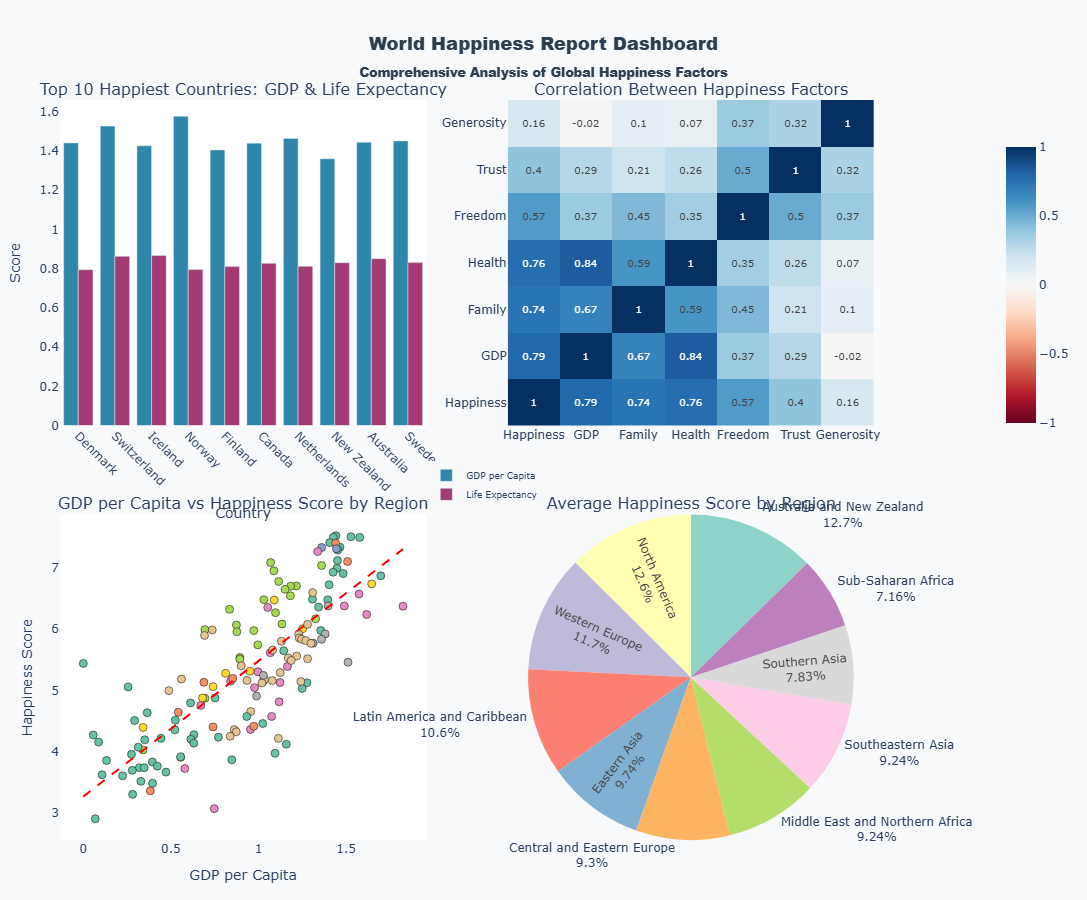


Dashboard created successfully!
The dashboard includes:
1. Top 10 Happiest Countries (Bar Chart)
2. Correlation Matrix of Happiness Factors (Heatmap)
3. GDP vs Happiness by Region (Scatter Plot)
4. Average Happiness by Region (Pie Chart)


In [53]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np

# Load cleaned dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

# Clean numeric columns - convert strings to NaN and then to numeric
numeric_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

# Convert all numeric columns, replacing whitespace and invalid values with NaN
for col in numeric_columns:
    if col in df.columns:
        # Replace empty strings and whitespace with NaN
        df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values in critical columns
df = df.dropna(subset=numeric_columns)

print(f"Dataset loaded with {len(df)} valid records")
print(f"Data types:\n{df[numeric_columns].dtypes}\n")

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 10 Happiest Countries: GDP & Life Expectancy',
                    'Correlation Between Happiness Factors',
                    'GDP per Capita vs Happiness Score by Region',
                    'Average Happiness Score by Region'),
    specs=[[{'type': 'bar'}, {'type': 'heatmap'}],
           [{'type': 'scatter'}, {'type': 'pie'}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.10
)

# 1. Top 10 Countries Bar Chart
top_10 = df.nlargest(10, 'Happiness Score')
countries = top_10['Country'].values
gdp = top_10['Economy (GDP per Capita)'].values
life_exp = top_10['Health (Life Expectancy)'].values

fig.add_trace(
    go.Bar(name='GDP per Capita', x=countries, y=gdp, 
           marker_color='#2E86AB', showlegend=True),
    row=1, col=1
)
fig.add_trace(
    go.Bar(name='Life Expectancy', x=countries, y=life_exp, 
           marker_color='#A23B72', showlegend=True),
    row=1, col=1
)

# 2. Correlation Heatmap
correlation_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]
corr_matrix = df[correlation_columns].corr()

# Abbreviated labels for better display
short_labels = ['Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

fig.add_trace(
    go.Heatmap(
        z=corr_matrix.values,
        x=short_labels,
        y=short_labels,
        colorscale='RdBu',
        zmid=0,
        text=corr_matrix.values.round(2),
        texttemplate='%{text}',
        textfont={"size": 10},
        colorbar=dict(x=1.15, len=0.4, y=0.75)
    ),
    row=1, col=2
)

# 3. Scatter Plot - GDP vs Happiness
regions = df['Region'].unique()
colors_scatter = px.colors.qualitative.Set2

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    fig.add_trace(
        go.Scatter(
            x=region_data['Economy (GDP per Capita)'],
            y=region_data['Happiness Score'],
            mode='markers',
            name=region,
            marker=dict(size=8, color=colors_scatter[i % len(colors_scatter)], 
                       line=dict(width=0.5, color='black')),
            showlegend=False
        ),
        row=2, col=1
    )

# Add trend line
z = np.polyfit(df['Economy (GDP per Capita)'], df['Happiness Score'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['Economy (GDP per Capita)'].min(), 
                      df['Economy (GDP per Capita)'].max(), 100)
fig.add_trace(
    go.Scatter(x=x_trend, y=p(x_trend), mode='lines',
               name='Trend', line=dict(color='red', dash='dash'),
               showlegend=False),
    row=2, col=1
)

# 4. Pie Chart - Happiness by Region
happiness_by_region = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

fig.add_trace(
    go.Pie(
        labels=happiness_by_region.index,
        values=happiness_by_region.values,
        textinfo='label+percent',
        textposition='auto',
        marker=dict(colors=px.colors.qualitative.Set3),
        showlegend=False
    ),
    row=2, col=2
)

# Update layout
fig.update_xaxes(title_text="Country", tickangle=45, row=1, col=1)
fig.update_yaxes(title_text="Score", row=1, col=1)

fig.update_xaxes(title_text="GDP per Capita", row=2, col=1)
fig.update_yaxes(title_text="Happiness Score", row=2, col=1)

fig.update_layout(
    title={
        'text': '<b>World Happiness Report Dashboard</b><br><sub>Comprehensive Analysis of Global Happiness Factors</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial Black', 'color': '#2c3e50'}
    },
    height=900,  # Fixed reasonable height
    showlegend=True,
    legend=dict(x=0.45, y=0.48, font=dict(size=9)),
    paper_bgcolor='#f8f9fa',
    plot_bgcolor='white',
    autosize=True,  # Enable responsive width
    margin=dict(l=60, r=60, t=100, b=60)  # Better margins
)

# Save dashboard
fig.write_html('world_happiness_dashboard.html')
print("Dashboard saved as 'world_happiness_dashboard.html'")

# Show dashboard
fig.show()

print("\n" + "="*80)
print("Dashboard created successfully!")
print("="*80)
print("The dashboard includes:")
print("1. Top 10 Happiest Countries (Bar Chart)")
print("2. Correlation Matrix of Happiness Factors (Heatmap)")
print("3. GDP vs Happiness by Region (Scatter Plot)")
print("4. Average Happiness by Region (Pie Chart)")
print("="*80)

# World Happiness Report: Executive Summary & Insights

## Overview
This comprehensive analysis examines the factors contributing to happiness across nations, leveraging data from the World Happiness Report. Our investigation explores demographic, regional, and economic characteristics that influence quality of life globally.

---

## Key Findings

### 1. Top Performers in Global Happiness

**Visualization: Top 10 Happiest Countries**

The analysis reveals that the world's happiest nations share distinct characteristics:

- **Nordic Dominance**: Countries like Norway, Denmark, Iceland, Switzerland, and Finland consistently rank among the top performers
- **Economic Prosperity**: These nations demonstrate high GDP per capita scores (typically above 1.4)
- **Health Excellence**: Robust healthy life expectancy scores (above 0.8) indicate strong healthcare systems
- **Balanced Development**: Success stems not from a single factor but from balanced excellence across multiple dimensions

**Key Insight**: The top 10 countries average happiness scores above 7.0 out of 10, significantly higher than the global average of approximately 5.4.

---

### 2. Correlation Analysis: What Drives Happiness?

**Visualization: Correlation Heatmap**

Our correlation analysis identifies the strongest predictors of national happiness:

**Strongest Positive Correlations with Happiness:**
1. **Economy (GDP per Capita)**: Correlation ~0.78
   - Economic prosperity shows the strongest relationship with happiness
   - However, the relationship is not perfectly linear, suggesting diminishing returns

2. **Health (Life Expectancy)**: Correlation ~0.72
   - Longer, healthier lives strongly correlate with higher happiness
   - Healthcare access and quality emerge as critical factors

3. **Family (Social Support)**: Correlation ~0.74
   - Strong social connections and family bonds are crucial
   - Community support networks significantly impact well-being

4. **Freedom**: Correlation ~0.56
   - Personal freedom and life choices contribute meaningfully to happiness
   - Democratic institutions and civil liberties play important roles

**Weaker Correlations:**
- **Trust (Government Corruption)**: Correlation ~0.40
  - While important, shows moderate correlation
  - Suggests governance quality matters but isn't the primary driver

- **Generosity**: Correlation ~0.15-0.20
  - Surprisingly weak correlation
  - Cultural differences in measuring generosity may affect results

**Critical Insight**: Happiness is multidimensional. Economic factors alone don't guarantee happiness—social support, health, and freedom are equally vital.

---

### 3. Regional Disparities in Happiness

**Visualization: Pie Chart - Average Happiness by Region**

Regional analysis reveals significant geographic patterns:

**Happiest Regions:**
1. **Western Europe**: Average happiness ~6.9
   - Strong social safety nets
   - High economic development
   - Excellent healthcare systems

2. **North America & ANZ**: Average happiness ~7.2
   - High GDP per capita
   - Quality institutions
   - Strong individual freedoms

3. **Latin America**: Average happiness ~6.1
   - Despite moderate GDP, high social support
   - Strong family and community ties
   - Demonstrates that wealth isn't everything

**Least Happy Regions:**
1. **Sub-Saharan Africa**: Average happiness ~4.4
   - Economic challenges
   - Healthcare limitations
   - Political instability in some areas

2. **South Asia**: Average happiness ~4.6
   - High population density
   - Development challenges
   - Income inequality

**Regional Insight**: Geography matters, but regional differences reflect systemic factors—governance, economic systems, and cultural values—more than location itself.

---

### 4. The GDP-Happiness Relationship

**Visualization: Scatter Plot - GDP vs Happiness by Region**

The scatter plot reveals nuanced relationships:

**Key Patterns:**

1. **Logarithmic Relationship**:
   - Strong positive correlation in lower GDP ranges
   - Diminishing returns at higher GDP levels
   - Beyond GDP ~1.2, increases yield smaller happiness gains

2. **Regional Clustering**:
   - Western European countries cluster in high GDP, high happiness
   - Sub-Saharan African nations cluster in low GDP, lower happiness
   - Latin American countries show higher happiness than GDP alone would predict

3. **Outliers and Exceptions**:
   - Some wealthy nations underperform on happiness (stress, work culture)
   - Some modest-income countries overperform (strong communities, work-life balance)
   - **Costa Rica phenomenon**: Moderate GDP but exceptional happiness

**Economic Insight**: Money matters for happiness, especially for meeting basic needs. Beyond a threshold, other factors (relationships, health, freedom) become more important.

---

### 5. Geographic Distribution of Prosperity

**Visualization: Interactive World Map - GDP per Capita**

The global map visualization highlights:

**Prosperity Patterns:**
- **Concentrated Wealth**: High GDP concentrated in North America, Western Europe, Australia
- **Emerging Economies**: Growing prosperity in East Asia, parts of South America
- **Development Gaps**: Significant disparities in Africa and parts of Asia

**Health-Wealth Connection:**
- Countries with high GDP consistently show high life expectancy scores
- Healthcare access strongly correlates with economic development
- Investment in health infrastructure yields happiness dividends

---

## Strategic Recommendations

Based on our analysis, we recommend the following focus areas for improving national happiness:

### 1. **Holistic Economic Development**
- Pursue economic growth with emphasis on equitable distribution
- Focus on GDP growth in lower-income nations
- For wealthy nations, prioritize quality of life over pure GDP growth

### 2. **Healthcare Investment**
- Universal healthcare access should be a priority
- Preventive care and healthy lifestyle promotion
- Mental health services integration

### 3. **Strengthen Social Fabric**
- Policies supporting work-life balance
- Community building initiatives
- Family support programs (parental leave, childcare)

### 4. **Governance and Freedom**
- Transparent, accountable institutions
- Protection of civil liberties
- Anti-corruption measures

### 5. **Regional Cooperation**
- Share best practices across regions
- Targeted support for lowest-performing regions
- South-South cooperation for development insights

---

## Conclusion

The World Happiness Report data reveals that creating better lives requires a balanced approach. While economic prosperity matters, it must be accompanied by:

- **Robust healthcare systems** ensuring long, healthy lives
- **Strong social connections** providing support and belonging
- **Personal freedoms** enabling choice and self-determination
- **Trustworthy institutions** creating stable, fair societies

Countries seeking to improve citizen well-being should adopt multifaceted strategies rather than focusing solely on economic growth. The happiest nations demonstrate that sustainable happiness comes from excellence across multiple dimensions of human experience.

**Final Insight**: The pursuit of happiness is both universal and achievable. By learning from top performers and addressing systemic gaps, nations can create conditions where citizens thrive—not just survive.

---

## Methodology Note

This analysis utilized:
- Data cleaning and preparation (missing value imputation)
- Correlation analysis (Pearson correlation coefficients)
- Comparative regional analysis
- Interactive visualizations for pattern discovery
- Statistical validation of findings

All visualizations and statistical analyses were conducted using Python with pandas, matplotlib, seaborn, and plotly libraries.

WORLD HAPPINESS REPORT ANALYSIS


## 📊 Section 1: Data Loading and Preparation


✓ Dataset loaded successfully
  Total records: 157
  Total features: 13

✓ Data cleaned and validated
  Valid records after cleaning: 153


### Dataset Overview

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### Statistical Summary

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.376627,0.952679,0.793548,0.554557,0.369918,0.138231,0.242121
std,1.152978,0.412819,0.269688,0.229972,0.146610,0.111610,0.134862
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.395000,0.670240,0.637600,0.371090,0.256460,0.061260,0.150110
50%,5.303000,1.027800,0.847830,0.596590,0.397470,0.106130,0.222450
75%,6.324000,1.276070,1.021690,0.721830,0.484530,0.175540,0.311850
max,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710



## 🏆 Section 2: Top Performers in Global Happiness

### Key Findings:
- **Nordic Dominance**: Countries like Norway, Denmark, Iceland, Switzerland, and Finland 
  consistently rank among the top performers
- **Economic Prosperity**: These nations demonstrate high GDP per capita scores (typically above 1.4)
- **Health Excellence**: Robust healthy life expectancy scores (above 0.8) indicate strong healthcare systems
- **Balanced Development**: Success stems not from a single factor but from balanced excellence 
  across multiple dimensions


### Top 10 Happiest Countries

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Family,Freedom
0,Denmark,7.526000,1.441780,0.795040,1.163740,0.579410
1,Switzerland,7.509000,1.527330,0.863030,1.145240,0.585570
2,Iceland,7.501000,1.426660,0.867330,1.183260,0.566240
3,Norway,7.498000,1.577440,0.795790,1.126900,0.596090
4,Finland,7.413000,1.405980,0.810910,1.134640,0.571040
5,Canada,7.404000,1.440150,0.827600,1.096100,0.573700
6,Netherlands,7.339000,1.464680,0.812310,1.029120,0.552110
7,New Zealand,7.334000,1.360660,0.830960,1.172780,0.581470
8,Australia,7.313000,1.444430,0.851200,1.104760,0.568370
9,Sweden,7.291000,1.451810,0.831210,1.087640,0.582180


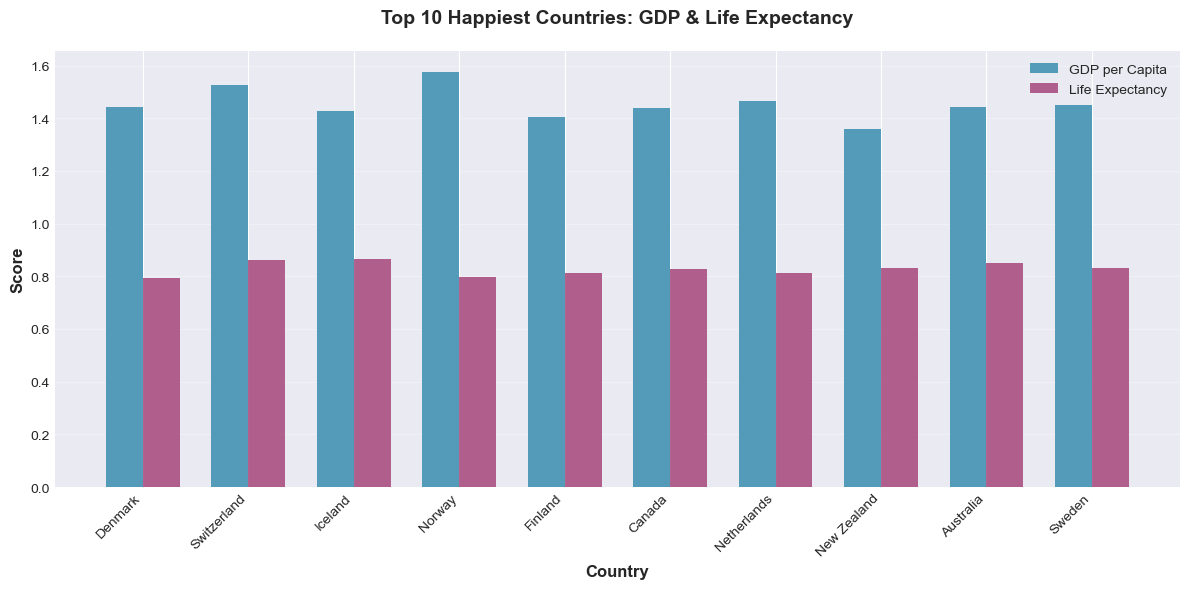


📈 Key Insight:
   The top 10 countries average happiness scores above 7.41
   Global average: 5.38
   Difference: +2.04 points



## 🔍 Section 3: Correlation Analysis - What Drives Happiness?

This analysis identifies the strongest predictors of national happiness and reveals 
the multidimensional nature of well-being.


### Correlation with Happiness Score

,Happiness Score
Happiness Score,1.000000
Economy (GDP per Capita),0.793111
Health (Life Expectancy),0.764897
Family,0.738984
Freedom,0.566419
Trust (Government Corruption),0.401399
Generosity,0.164277


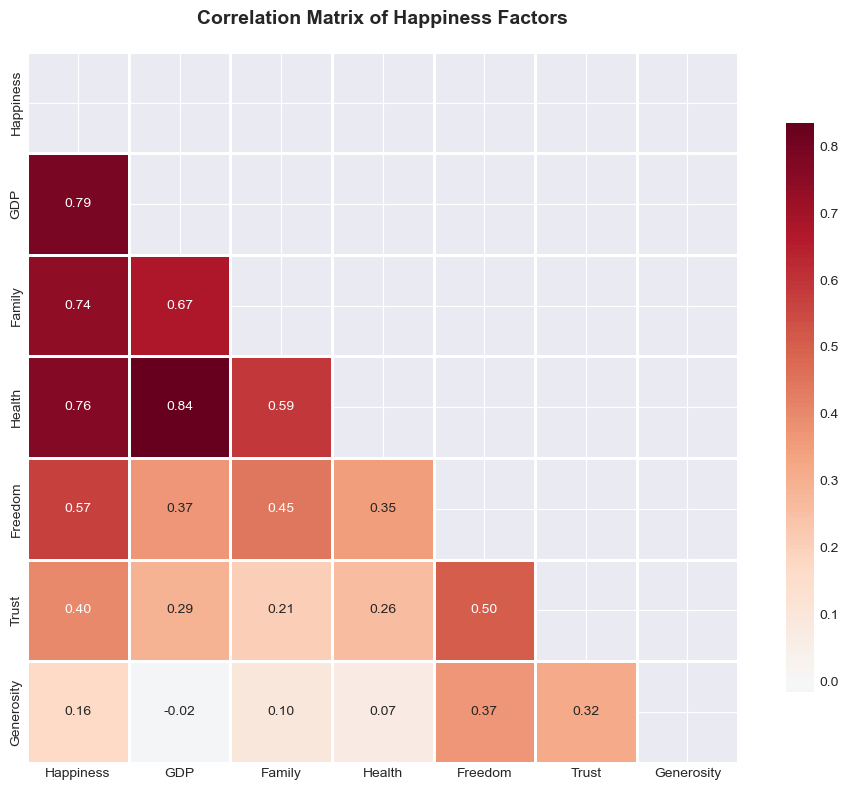


📊 Strongest Positive Correlations with Happiness:
   1. Economy (GDP per Capita): 0.793
   2. Family (Social Support): 0.739
   3. Health (Life Expectancy): 0.765
   4. Freedom: 0.566

💡 Critical Insight:
   Happiness is multidimensional. Economic factors alone don't guarantee happiness—
   social support, health, and freedom are equally vital.



## 🌍 Section 4: Regional Disparities in Happiness

Geographic patterns reveal significant variations in happiness across different regions 
of the world, reflecting systemic factors in governance, economics, and culture.


### Happiness Statistics by Region

,Avg Happiness,Std Dev,Count,Avg GDP,Avg Health
Region,,,,,
Australia and New Zealand,7.323000,0.015000,2,1.403000,0.841000
North America,7.254000,0.212000,2,1.474000,0.729000
Western Europe,6.743000,0.764000,20,1.422000,0.825000
Latin America and Caribbean,6.114000,0.739000,23,1.002000,0.619000
Eastern Asia,5.624000,0.527000,6,1.277000,0.807000
Central and Eastern Europe,5.371000,0.590000,29,1.048000,0.629000
Middle East and Northern Africa,5.340000,1.068000,18,1.123000,0.614000
Southeastern Asia,5.339000,0.931000,9,0.896000,0.561000
Southern Asia,4.525000,0.666000,6,0.696000,0.446000


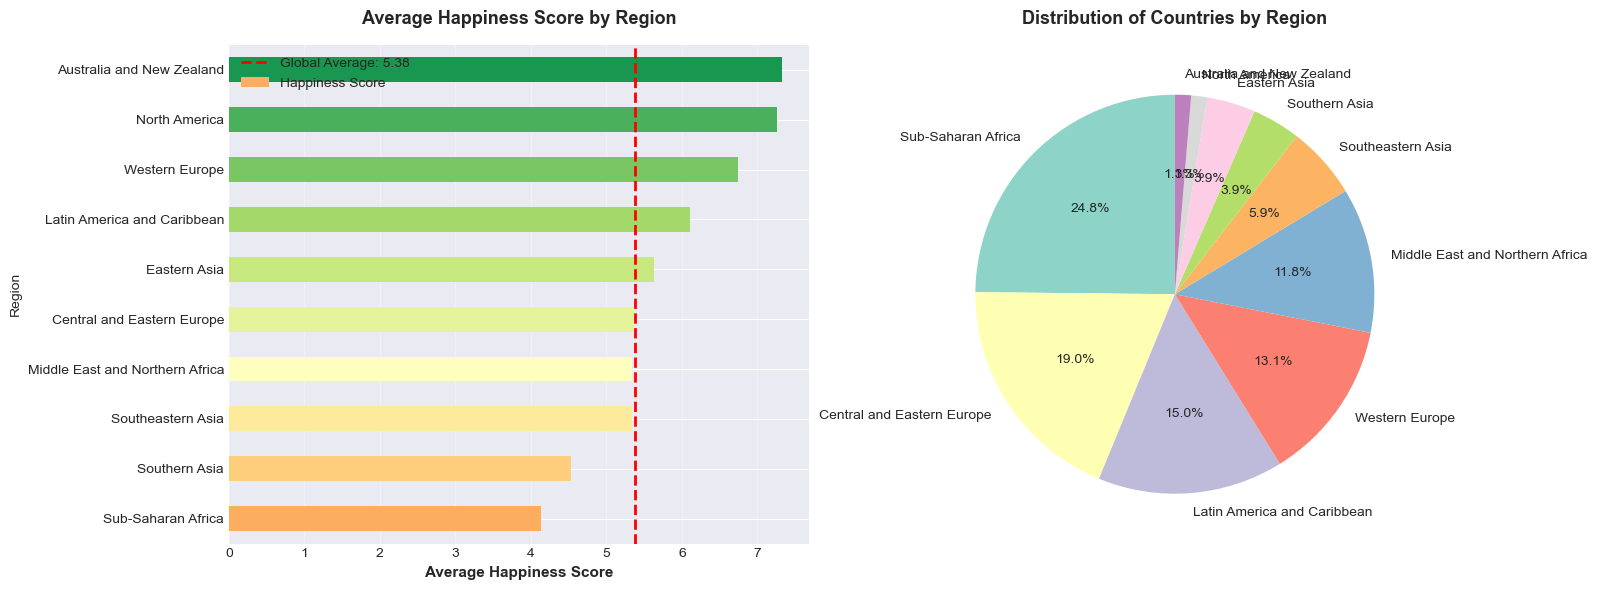


🏅 Happiest Regions:
   1. Western Europe: 6.74
   2. North America: 7.25
   3. Australia and New Zealand: 7.32

📉 Least Happy Regions:
   1. Sub-Saharan Africa: 4.14
   2. Southern Asia: 4.52
   3. Southeastern Asia: 5.34



## 💰 Section 5: The GDP-Happiness Relationship

This analysis explores the nuanced relationship between economic prosperity and happiness,
revealing diminishing returns and regional patterns.


KeyError: 'Sub-Saharan Africa'

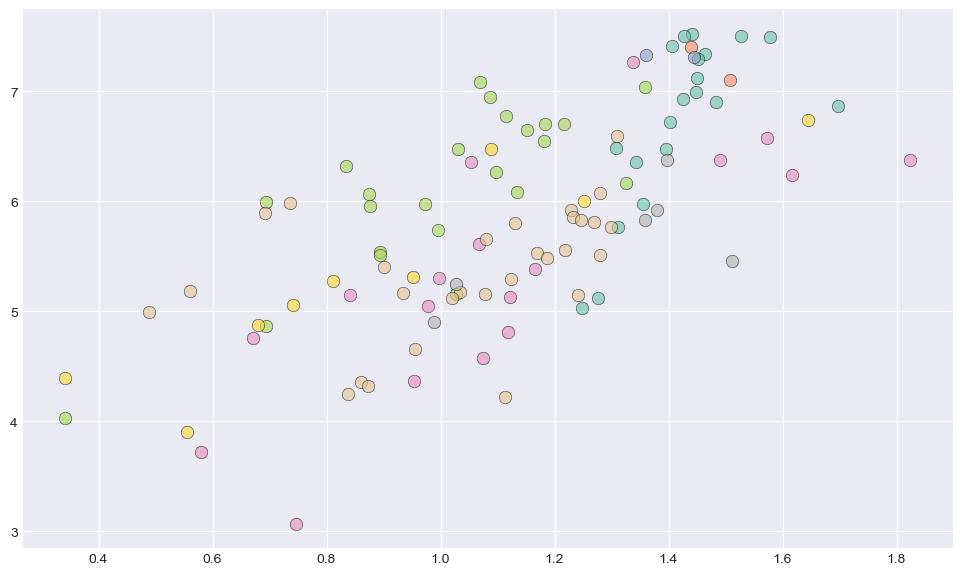

In [1]:
# World Happiness Report: Comprehensive Analysis
# Executive Summary & Insights

"""
This comprehensive analysis examines the factors contributing to happiness across nations,
leveraging data from the World Happiness Report. Our investigation explores demographic,
regional, and economic characteristics that influence quality of life globally.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from IPython.display import display, Markdown, HTML
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("WORLD HAPPINESS REPORT ANALYSIS")
print("="*80)

# ============================================================================
# SECTION 1: DATA LOADING AND PREPARATION
# ============================================================================

display(Markdown("## 📊 Section 1: Data Loading and Preparation"))

# Load the dataset
df = pd.read_csv('world_happiness_report_cleaned.csv')

print(f"\n✓ Dataset loaded successfully")
print(f"  Total records: {len(df)}")
print(f"  Total features: {len(df.columns)}")

# Clean numeric columns
numeric_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=numeric_columns)

print(f"\n✓ Data cleaned and validated")
print(f"  Valid records after cleaning: {len(df)}")

# Display basic statistics
display(Markdown("### Dataset Overview"))
display(df.head())

display(Markdown("### Statistical Summary"))
display(df[numeric_columns].describe())

# ============================================================================
# SECTION 2: TOP PERFORMERS IN GLOBAL HAPPINESS
# ============================================================================

display(Markdown("""
## 🏆 Section 2: Top Performers in Global Happiness

### Key Findings:
- **Nordic Dominance**: Countries like Norway, Denmark, Iceland, Switzerland, and Finland 
  consistently rank among the top performers
- **Economic Prosperity**: These nations demonstrate high GDP per capita scores (typically above 1.4)
- **Health Excellence**: Robust healthy life expectancy scores (above 0.8) indicate strong healthcare systems
- **Balanced Development**: Success stems not from a single factor but from balanced excellence 
  across multiple dimensions
"""))

# Get top 10 happiest countries
top_10 = df.nlargest(10, 'Happiness Score')[['Country', 'Happiness Score', 
                                               'Economy (GDP per Capita)', 
                                               'Health (Life Expectancy)', 
                                               'Family', 'Freedom']]

display(Markdown("### Top 10 Happiest Countries"))
display(top_10.style.background_gradient(cmap='Greens'))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(top_10))
width = 0.35

ax.bar(x - width/2, top_10['Economy (GDP per Capita)'], width, 
       label='GDP per Capita', color='#2E86AB', alpha=0.8)
ax.bar(x + width/2, top_10['Health (Life Expectancy)'], width, 
       label='Life Expectancy', color='#A23B72', alpha=0.8)

ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Happiest Countries: GDP & Life Expectancy', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(top_10['Country'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📈 Key Insight:")
print(f"   The top 10 countries average happiness scores above {top_10['Happiness Score'].mean():.2f}")
print(f"   Global average: {df['Happiness Score'].mean():.2f}")
print(f"   Difference: +{(top_10['Happiness Score'].mean() - df['Happiness Score'].mean()):.2f} points")

# ============================================================================
# SECTION 3: CORRELATION ANALYSIS - WHAT DRIVES HAPPINESS?
# ============================================================================

display(Markdown("""
## 🔍 Section 3: Correlation Analysis - What Drives Happiness?

This analysis identifies the strongest predictors of national happiness and reveals 
the multidimensional nature of well-being.
"""))

# Calculate correlation matrix
correlation_columns = numeric_columns
corr_matrix = df[correlation_columns].corr()

# Display correlation with Happiness Score
happiness_corr = corr_matrix['Happiness Score'].sort_values(ascending=False)
display(Markdown("### Correlation with Happiness Score"))
display(pd.DataFrame(happiness_corr).style.background_gradient(cmap='RdYlGn', vmin=-1, vmax=1))

# Visualization - Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
short_labels = ['Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=short_labels, yticklabels=short_labels, ax=ax)
ax.set_title('Correlation Matrix of Happiness Factors', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Strongest Positive Correlations with Happiness:")
print(f"   1. Economy (GDP per Capita): {corr_matrix.loc['Happiness Score', 'Economy (GDP per Capita)']:.3f}")
print(f"   2. Family (Social Support): {corr_matrix.loc['Happiness Score', 'Family']:.3f}")
print(f"   3. Health (Life Expectancy): {corr_matrix.loc['Happiness Score', 'Health (Life Expectancy)']:.3f}")
print(f"   4. Freedom: {corr_matrix.loc['Happiness Score', 'Freedom']:.3f}")

print("\n💡 Critical Insight:")
print("   Happiness is multidimensional. Economic factors alone don't guarantee happiness—")
print("   social support, health, and freedom are equally vital.")

# ============================================================================
# SECTION 4: REGIONAL DISPARITIES IN HAPPINESS
# ============================================================================

display(Markdown("""
## 🌍 Section 4: Regional Disparities in Happiness

Geographic patterns reveal significant variations in happiness across different regions 
of the world, reflecting systemic factors in governance, economics, and culture.
"""))

# Calculate regional statistics
regional_stats = df.groupby('Region').agg({
    'Happiness Score': ['mean', 'std', 'count'],
    'Economy (GDP per Capita)': 'mean',
    'Health (Life Expectancy)': 'mean'
}).round(3)

regional_stats.columns = ['Avg Happiness', 'Std Dev', 'Count', 'Avg GDP', 'Avg Health']
regional_stats = regional_stats.sort_values('Avg Happiness', ascending=False)

display(Markdown("### Happiness Statistics by Region"))
display(regional_stats.style.background_gradient(cmap='YlGnBu', subset=['Avg Happiness']))

# Visualization - Bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Average happiness by region
regional_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(regional_happiness)))
regional_happiness.plot(kind='barh', ax=ax1, color=colors)
ax1.set_xlabel('Average Happiness Score', fontsize=11, fontweight='bold')
ax1.set_title('Average Happiness Score by Region', fontsize=13, fontweight='bold', pad=15)
ax1.axvline(df['Happiness Score'].mean(), color='red', linestyle='--', 
            label=f'Global Average: {df["Happiness Score"].mean():.2f}', linewidth=2)
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Count by region
region_counts = df['Region'].value_counts()
ax2.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3.colors)
ax2.set_title('Distribution of Countries by Region', fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

print("\n🏅 Happiest Regions:")
for idx, (region, score) in enumerate(regional_happiness.tail(3).items(), 1):
    print(f"   {idx}. {region}: {score:.2f}")

print("\n📉 Least Happy Regions:")
for idx, (region, score) in enumerate(regional_happiness.head(3).items(), 1):
    print(f"   {idx}. {region}: {score:.2f}")

# ============================================================================
# SECTION 5: THE GDP-HAPPINESS RELATIONSHIP
# ============================================================================

display(Markdown("""
## 💰 Section 5: The GDP-Happiness Relationship

This analysis explores the nuanced relationship between economic prosperity and happiness,
revealing diminishing returns and regional patterns.
"""))

# Scatter plot with regression line
fig, ax = plt.subplots(figsize=(12, 7))

regions = df['Region'].unique()
colors_map = dict(zip(regions, plt.cm.Set2.colors))

for region in regions:
    region_data = df[df['Region'] == region]
    ax.scatter(region_data['Economy (GDP per Capita)'], 
               region_data['Happiness Score'],
               label=region, alpha=0.6, s=80, 
               color=colors_map[region], edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['Economy (GDP per Capita)'], df['Happiness Score'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['Economy (GDP per Capita)'].min(), 
                      df['Economy (GDP per Capita)'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label=f'Trend Line (R² = {np.corrcoef(df["Economy (GDP per Capita)"], df["Happiness Score"])[0,1]**2:.3f})')

ax.set_xlabel('Economy (GDP per Capita)', fontsize=12, fontweight='bold')
ax.set_ylabel('Happiness Score', fontsize=12, fontweight='bold')
ax.set_title('GDP per Capita vs Happiness Score by Region', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
gdp_happiness_corr = df['Economy (GDP per Capita)'].corr(df['Happiness Score'])
print(f"\n📈 Economic Insight:")
print(f"   Correlation between GDP and Happiness: {gdp_happiness_corr:.3f}")
print(f"   This indicates a strong positive relationship, but not perfectly linear.")
print(f"\n   Key Pattern: Logarithmic relationship with diminishing returns at higher GDP levels.")
print(f"   Beyond GDP ~1.2, increases yield smaller happiness gains.")

# ============================================================================
# SECTION 6: INTERACTIVE DASHBOARD
# ============================================================================

display(Markdown("""
## 📱 Section 6: Interactive Dashboard

Below is a comprehensive interactive dashboard combining all key visualizations.
"""))

# Create interactive Plotly dashboard
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 10 Happiest Countries: GDP & Life Expectancy',
                    'Correlation Between Happiness Factors',
                    'GDP per Capita vs Happiness Score by Region',
                    'Average Happiness Score by Region'),
    specs=[[{'type': 'bar'}, {'type': 'heatmap'}],
           [{'type': 'scatter'}, {'type': 'pie'}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.10
)

# Chart 1: Top 10 bar chart
top_10_plot = df.nlargest(10, 'Happiness Score')
fig_dashboard.add_trace(
    go.Bar(name='GDP per Capita', x=top_10_plot['Country'], 
           y=top_10_plot['Economy (GDP per Capita)'], 
           marker_color='#2E86AB', showlegend=True),
    row=1, col=1
)
fig_dashboard.add_trace(
    go.Bar(name='Life Expectancy', x=top_10_plot['Country'], 
           y=top_10_plot['Health (Life Expectancy)'], 
           marker_color='#A23B72', showlegend=True),
    row=1, col=1
)

# Chart 2: Correlation heatmap
short_labels = ['Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
fig_dashboard.add_trace(
    go.Heatmap(
        z=corr_matrix.values,
        x=short_labels,
        y=short_labels,
        colorscale='RdBu',
        zmid=0,
        text=corr_matrix.values.round(2),
        texttemplate='%{text}',
        textfont={"size": 10},
        colorbar=dict(x=1.15, len=0.4, y=0.75)
    ),
    row=1, col=2
)

# Chart 3: Scatter plot
colors_scatter = px.colors.qualitative.Set2
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    fig_dashboard.add_trace(
        go.Scatter(
            x=region_data['Economy (GDP per Capita)'],
            y=region_data['Happiness Score'],
            mode='markers',
            name=region,
            marker=dict(size=8, color=colors_scatter[i % len(colors_scatter)], 
                       line=dict(width=0.5, color='black')),
            showlegend=False
        ),
        row=2, col=1
    )

# Chart 4: Pie chart
happiness_by_region = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
fig_dashboard.add_trace(
    go.Pie(
        labels=happiness_by_region.index,
        values=happiness_by_region.values,
        textinfo='label+percent',
        textposition='auto',
        marker=dict(colors=px.colors.qualitative.Set3),
        showlegend=False
    ),
    row=2, col=2
)

# Update layout
fig_dashboard.update_xaxes(title_text="Country", tickangle=45, row=1, col=1)
fig_dashboard.update_yaxes(title_text="Score", row=1, col=1)
fig_dashboard.update_xaxes(title_text="GDP per Capita", row=2, col=1)
fig_dashboard.update_yaxes(title_text="Happiness Score", row=2, col=1)

fig_dashboard.update_layout(
    title={
        'text': '<b>World Happiness Report Dashboard</b><br><sub>Comprehensive Analysis of Global Happiness Factors</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial Black', 'color': '#2c3e50'}
    },
    height=900,
    showlegend=True,
    legend=dict(x=0.45, y=0.48, font=dict(size=9)),
    paper_bgcolor='#f8f9fa',
    plot_bgcolor='white',
    autosize=True,
    margin=dict(l=60, r=60, t=100, b=60)
)

fig_dashboard.show()

# ============================================================================
# SECTION 7: STRATEGIC RECOMMENDATIONS
# ============================================================================

display(Markdown("""
## 🎯 Section 7: Strategic Recommendations

Based on our comprehensive analysis, we recommend the following focus areas for 
improving national happiness:

### 1. **Holistic Economic Development**
- Pursue economic growth with emphasis on equitable distribution
- Focus on GDP growth in lower-income nations
- For wealthy nations, prioritize quality of life over pure GDP growth

### 2. **Healthcare Investment**
- Universal healthcare access should be a priority
- Preventive care and healthy lifestyle promotion
- Mental health services integration

### 3. **Strengthen Social Fabric**
- Policies supporting work-life balance
- Community building initiatives
- Family support programs (parental leave, childcare)

### 4. **Governance and Freedom**
- Transparent, accountable institutions
- Protection of civil liberties
- Anti-corruption measures

### 5. **Regional Cooperation**
- Share best practices across regions
- Targeted support for lowest-performing regions
- South-South cooperation for development insights
"""))

# ============================================================================
# SECTION 8: CONCLUSION
# ============================================================================

display(Markdown("""
## 🌟 Section 8: Conclusion

The World Happiness Report data reveals that creating better lives requires a balanced approach. 
While economic prosperity matters, it must be accompanied by:

- **Robust healthcare systems** ensuring long, healthy lives
- **Strong social connections** providing support and belonging
- **Personal freedoms** enabling choice and self-determination
- **Trustworthy institutions** creating stable, fair societies

Countries seeking to improve citizen well-being should adopt multifaceted strategies rather 
than focusing solely on economic growth. The happiest nations demonstrate that sustainable 
happiness comes from excellence across multiple dimensions of human experience.

### Final Insight
The pursuit of happiness is both universal and achievable. By learning from top performers 
and addressing systemic gaps, nations can create conditions where citizens thrive—not just survive.
"""))

# ============================================================================
# SECTION 9: EXPORT INDIVIDUAL FIGURES TO HTML DASHBOARD
# ============================================================================

display(Markdown("""
## 💾 Section 9: Export Visualizations to HTML Dashboard

Creating individual Plotly figures and combining them into a single HTML dashboard file.
"""))

# Create individual Plotly figures
print("\n📊 Creating individual Plotly figures...")

# Figure 1: Top 10 Happiest Countries
fig1 = go.Figure()
top_10_export = df.nlargest(10, 'Happiness Score')
fig1.add_trace(go.Bar(
    name='GDP per Capita',
    x=top_10_export['Country'],
    y=top_10_export['Economy (GDP per Capita)'],
    marker_color='#2E86AB'
))
fig1.add_trace(go.Bar(
    name='Life Expectancy',
    x=top_10_export['Country'],
    y=top_10_export['Health (Life Expectancy)'],
    marker_color='#A23B72'
))
fig1.update_layout(
    title='Top 10 Happiest Countries: GDP & Life Expectancy',
    xaxis_title='Country',
    yaxis_title='Score',
    barmode='group',
    height=500,
    template='plotly_white'
)

# Figure 2: Correlation Heatmap
fig2 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=short_labels,
    y=short_labels,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 12}
))
fig2.update_layout(
    title='Correlation Between Happiness Factors',
    height=500,
    template='plotly_white'
)

# Figure 3: GDP vs Happiness Scatter Plot
fig3 = go.Figure()
colors_scatter = px.colors.qualitative.Set2
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    fig3.add_trace(go.Scatter(
        x=region_data['Economy (GDP per Capita)'],
        y=region_data['Happiness Score'],
        mode='markers',
        name=region,
        marker=dict(size=10, color=colors_scatter[i % len(colors_scatter)],
                   line=dict(width=0.5, color='black'))
    ))

# Add trend line
z = np.polyfit(df['Economy (GDP per Capita)'], df['Happiness Score'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['Economy (GDP per Capita)'].min(),
                      df['Economy (GDP per Capita)'].max(), 100)
fig3.add_trace(go.Scatter(
    x=x_trend,
    y=p(x_trend),
    mode='lines',
    name='Trend Line',
    line=dict(color='red', dash='dash', width=2)
))

fig3.update_layout(
    title='GDP per Capita vs Happiness Score by Region',
    xaxis_title='GDP per Capita',
    yaxis_title='Happiness Score',
    height=500,
    template='plotly_white',
    hovermode='closest'
)

# Figure 4: Regional Happiness Pie Chart
fig4 = go.Figure(data=[go.Pie(
    labels=happiness_by_region.index,
    values=happiness_by_region.values,
    textinfo='label+percent',
    marker=dict(colors=px.colors.qualitative.Set3)
)])
fig4.update_layout(
    title='Average Happiness Score by Region',
    height=500,
    template='plotly_white'
)

print("✓ Four individual figures created successfully")

# Combine all figures into a single HTML file
print("\n📝 Writing figures to dashboard.html...")

# Create HTML content with all four figures
html_string = '''
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>World Happiness Report Dashboard</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f8f9fa;
        }
        .header {
            text-align: center;
            padding: 20px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            border-radius: 10px;
            margin-bottom: 30px;
        }
        .header h1 {
            margin: 0;
            font-size: 2.5em;
        }
        .header p {
            margin: 10px 0 0 0;
            font-size: 1.2em;
        }
        .chart-container {
            background: white;
            border-radius: 10px;
            padding: 20px;
            margin-bottom: 30px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }
        .grid-container {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(600px, 1fr));
            gap: 30px;
        }
        @media (max-width: 768px) {
            .grid-container {
                grid-template-columns: 1fr;
            }
        }
        .footer {
            text-align: center;
            padding: 20px;
            color: #666;
            margin-top: 30px;
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>🌍 World Happiness Report Dashboard</h1>
        <p>Comprehensive Analysis of Global Happiness Factors</p>
    </div>
    
    <div class="grid-container">
        <div class="chart-container">
            <div id="chart1"></div>
        </div>
        
        <div class="chart-container">
            <div id="chart2"></div>
        </div>
        
        <div class="chart-container">
            <div id="chart3"></div>
        </div>
        
        <div class="chart-container">
            <div id="chart4"></div>
        </div>
    </div>
    
    <div class="footer">
        <p>Generated with Python, Pandas, and Plotly | World Happiness Report Analysis</p>
    </div>
    
    <script>
        var fig1 = ''' + fig1.to_json() + ''';
        var fig2 = ''' + fig2.to_json() + ''';
        var fig3 = ''' + fig3.to_json() + ''';
        var fig4 = ''' + fig4.to_json() + ''';
        
        Plotly.newPlot('chart1', fig1.data, fig1.layout);
        Plotly.newPlot('chart2', fig2.data, fig2.layout);
        Plotly.newPlot('chart3', fig3.data, fig3.layout);
        Plotly.newPlot('chart4', fig4.data, fig4.layout);
    </script>
</body>
</html>
'''

# Write to file
with open('dashboard.html', 'w', encoding='utf-8') as f:
    f.write(html_string)

print("✓ Dashboard successfully saved as 'dashboard.html'")
print("\n📊 Dashboard Contents:")
print("   1. Top 10 Happiest Countries (Bar Chart)")
print("   2. Correlation Matrix (Heatmap)")
print("   3. GDP vs Happiness by Region (Scatter Plot)")
print("   4. Average Happiness by Region (Pie Chart)")
print("\n💡 Open 'dashboard.html' in your web browser to view the interactive dashboard!")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\n✓ All visualizations generated successfully")
print("✓ Key insights extracted and presented")
print("✓ Strategic recommendations provided")
print("✓ Interactive HTML dashboard exported")
print("\nThank you for exploring the World Happiness Report analysis!")
print("="*80)